In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import glob
import json

In [15]:
# charge states of interest
MIN_CHARGE = 2
MAX_CHARGE = 4

# number of isotopes of interest
MIN_ISOTOPES = 2
MAX_ISOTOPES = 7

digits = '0123456789'

def calculate_feature_class(isotopes, charge):
    assert ((isotopes >= MIN_ISOTOPES) and (isotopes <= MAX_ISOTOPES)), "isotopes must be between {} and {}".format(MIN_ISOTOPES, MAX_ISOTOPES)
    assert ((charge >= MIN_CHARGE) and (charge <= MAX_CHARGE)), "charge must be between {} and {}".format(MIN_CHARGE, MAX_CHARGE)
    charge_idx = charge - MIN_CHARGE
    isotope_idx = isotopes - MIN_ISOTOPES
    feature_class = charge_idx * (MAX_ISOTOPES-MIN_ISOTOPES+1) + isotope_idx
    return feature_class

def feature_names():
    names = []
    for ch in range(MIN_CHARGE,MAX_CHARGE+1):
        for iso in range(MIN_ISOTOPES,MAX_ISOTOPES+1):
            names.append('charge-{}-isotopes-{}'.format(ch, iso))
    return names


In [26]:
# load all the JSON files that have been reviewed and count the class instances
ANNOTATIONS_DIR = '/Users/darylwilding-mcbride/Downloads/upload your edited annotations to this folder/trimmed'
annotations_file_list = sorted(glob.glob("{}/*.json".format(ANNOTATIONS_DIR)))
features_l = []

for annotation_file_name in annotations_file_list:
    with open(annotation_file_name) as file:
        annotations = json.load(file)

    for tile_key in list(annotations.keys()):
        tile_d = annotations[tile_key]
        tile_regions = tile_d['regions']
        # process this tile if there are annotations for it
        if len(tile_regions) > 0:
            for region in tile_regions:
                # determine the attributes of this feature
                region_attributes = region['region_attributes']
                charge = int(''.join(c for c in region_attributes['charge'] if c in digits))
                isotopes = int(region_attributes['isotopes'])
                feature_class = calculate_feature_class(isotopes, charge)
                feature_class_name = feature_names()[feature_class]
                features_l.append((charge,isotopes,feature_class,feature_class_name))
features_df = pd.DataFrame(features_l, columns=['charge','isotopes','feature_class','feature_class_name'])

In [27]:
instances_l = []
for group_name,group_df in features_df.groupby(['feature_class'], as_index=False):
    instances_l.append((group_name,group_df.charge.iloc[0],len(group_df)))

In [30]:
instances_df = pd.DataFrame(instances_l, columns=['object_type','charge','instances'])

In [31]:
instances_df

,object_type,charge,instances
0,0,2,762
1,1,2,1275
2,2,2,687
3,3,2,463
4,4,2,223
5,5,2,119
6,6,3,62
7,7,3,313
8,8,3,361
9,9,3,225


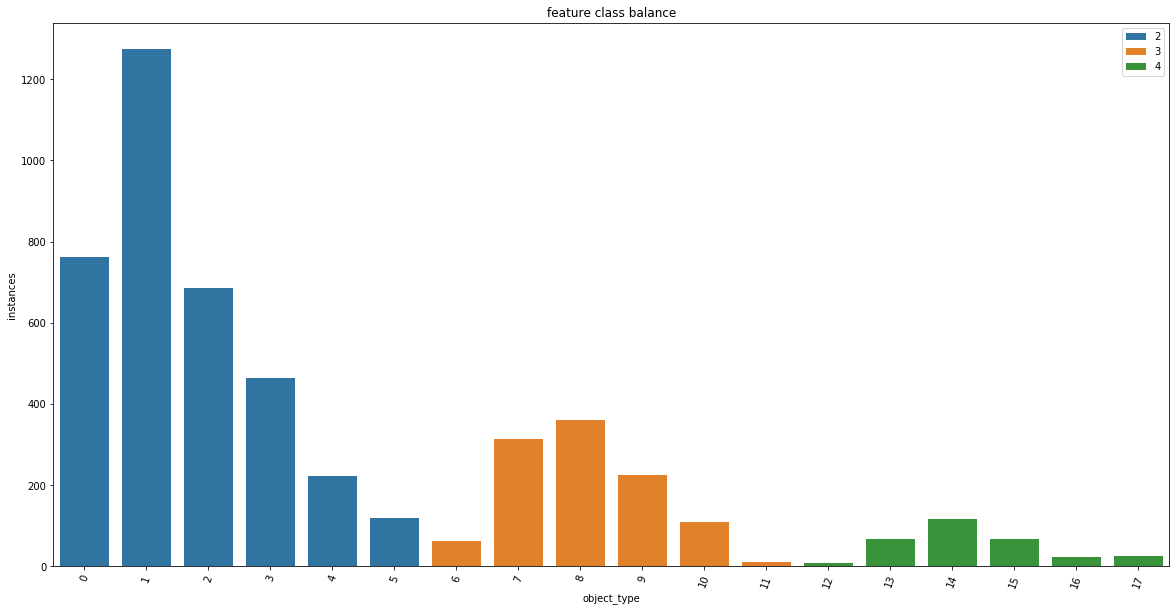

In [34]:
import seaborn as sns

plt.figure(figsize=(20, 10))
sns.barplot(x="object_type", hue="charge", y="instances", data=instances_df, dodge=False)
index = np.arange(len(instances_df))
plt.xticks(index, instances_df.object_type, fontsize=10, rotation=70)
plt.title('feature class balance')
plt.legend(loc='upper right')
plt.show()